In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import seaborn as sns
from datetime import datetime, date, time, timezone
import matplotlib.pyplot as plt

In [3]:
actors_aw=pd.read_pickle('data/actors_awards_subset.pkl')

In [4]:
actors_aw.head()

,nconst,year,category,w_n,description,movie,tconst
0,nm0309470,2005,David,Nominee,Best Supporting Actress (Migliore Attrice non ...,Cuore sacro,tt0429898
1,nm0309470,1968,Golden Plate,Winner,,Grazie zia,tt0063033
2,nm0309470,2005,Golden Ciak,Winner,Best Supporting Actress (Migliore Attrice Non ...,Cuore sacro,tt0429898
3,nm0309470,1967,Golden Globe,Winner,Best Actress (Migliore Attrice),Svegliati e uccidi,tt0061049
4,nm0309470,1968,Golden Goblet,Winner,Best Actress (Migliore Attrice),Grazie zia,tt0063033


In [10]:
#The total number of ceremonies
actors_aw.category.value_counts()

Primetime Emmy                                                4926
Golden Globe                                                  4485
Actor                                                         2836
Oscar                                                         2138
OFTA Television Award                                         1831
                                                              ... 
C.I.C.A.E. Award - Special Mention                               1
"The General" Honorary Award                                     1
Best Actor Short                                                 1
Golden Train Award                                               1
Prize of the International Critics' Jury - Special Mention       1
Name: category, Length: 3950, dtype: int64

In [11]:
#w_n
actors_aw.w_n.value_counts()

Nominee    76733
Winner     62880
Name: w_n, dtype: int64

In [12]:
movies=pd.DataFrame(pd.read_pickle('movies_subset.pkl'))

In [11]:
movies.head()

,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,metascore,musicProducer
0,tt0014799,"[nm0265550, nm0370407, nm0550195]",0,0,0,1924-05-31,UK,[],None,None,None,None
1,tt0014843,"[nm0427659, nm0107574, nm0421138]",0,0,0,1924-08-24,USA,[],None,None,None,None
2,tt0014809,"[nm0267916, nm0119572, nm0055809]",0,0,0,1924-04-08,USA,[],None,None,None,None
3,tt0014751,"[nm0403710, nm0744408]",0,0,0,None,None,[],None,None,None,None
4,tt0014812,"[nm0556953, nm0531962, nm0645941]",0,0,0,1924-12-28,USA,[],None,None,None,None


We have a subset of 178117 movies. Each movie is represented via 12 features

In [12]:
movies.shape

(178117, 12)

In [146]:
#Movie features:
movies.columns

Index(['tconst', 'stars', 'oscarWins', 'nominations', 'wins', 'releaseDate',
       'releaseCountry', 'plotKeywords', 'budget', 'worldwideGross',
       'metascore', 'musicProducer', 'Gain_loss', 'month', 'year'],
      dtype='object')

We begin our analysis by inspecting the values of each features. Since the data comes from scraping the website IMDB, Old movies are missing a lot of data. 

In [13]:
oscar_wins=movies[movies.oscarWins>=1]

In [14]:
len(oscar_wins)

265

In [26]:
movies.dtypes 

tconst            object
stars             object
oscarWins          int64
nominations        int64
wins               int64
releaseDate       object
releaseCountry    object
plotKeywords      object
budget            object
worldwideGross    object
metascore         object
musicProducer     object
dtype: object

In [132]:
movies.iloc[0,5].month

5

In [34]:
def rem_dollar(st):
    if(st!=None):
        return int(re.sub(r'[a-zA-Z,@\'?\.$%_]', '', st))

In [38]:
movies.worldwideGross=movies.apply(lambda x:rem_dollar(x.worldwideGross), axis=1)

TypeError: ('expected string or bytes-like object', 'occurred at index 0')

In [41]:
movies.worldwideGross.describe()

count    9.073000e+03
mean     2.594221e+07
std      7.784786e+07
min      0.000000e+00
25%      1.221210e+05
50%      2.046433e+06
75%      1.648735e+07
max      2.187464e+09
Name: worldwideGross, dtype: float64

Text(0.5, 1.0, 'histogram worldwide gross in Million $')

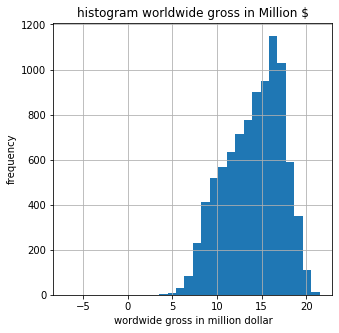

In [42]:
ax,fig=plt.subplots(figsize=(5,5))
np.log(movies.worldwideGross+0.001).hist(bins=30)

plt.xlabel('wordwide gross in million dollar')
plt.ylabel('frequency')
plt.title('histogram worldwide gross in Million $')

In [26]:
movies.budget=movies.apply(lambda x: rem_dollar(x.budget),axis=1)

Text(0.5, 1.0, 'histogram of the budget in Million $')

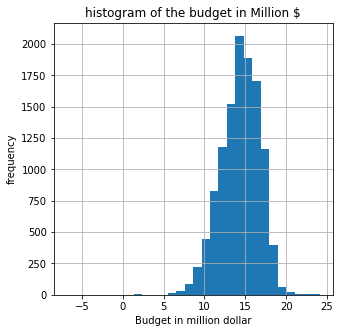

In [30]:
ax,fig=plt.subplots(figsize=(5,5))
np.log(movies.budget+0.001).hist(bins=30)

plt.xlabel('Budget in million dollar')
plt.ylabel('frequency')
plt.title('histogram of the budget in Million $')

In [120]:
movies['Gain_loss']=movies.apply(lambda x: x.worldwideGross-x.budget,axis=1)

In [121]:
movies.Gain_loss.describe()

count    4.432000e+03
mean     9.758234e+06
std      5.495241e+08
min     -2.999285e+10
25%     -6.375574e+06
50%     -4.349700e+04
75%      2.215926e+07
max      1.987464e+09
dtype: float64

In [17]:
def to_int(meta):
    if(meta!=None):
        return int(meta)

In [18]:
movies.metascore=movies.apply(lambda x: to_int(x.metascore),axis=1)

In [19]:
movies.metascore.describe()

count    4950.000000
mean       57.622222
std        18.594554
min         1.000000
25%        45.000000
50%        59.000000
75%        71.000000
max       100.000000
Name: metascore, dtype: float64

Text(0.5, 1.0, 'histogram of the metascore')

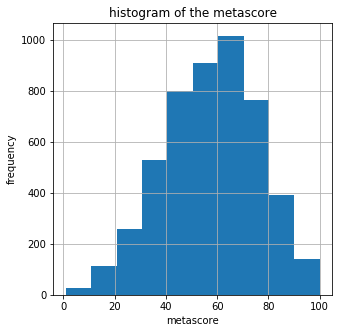

In [23]:
ax, fig= plt.subplots(figsize=(5,5))
movies.metascore.hist()
plt.xlabel('Metascore')
plt.ylabel('frequency')
plt.title('histogram of the metascore')

In [129]:
cor=movies.corr()

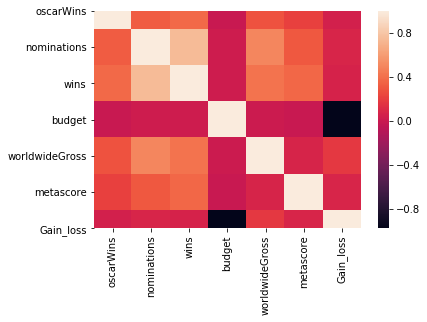

In [130]:

sns.heatmap(cor)


In [141]:
def get_month(date):
    if(date!=None):
        return date.month

In [139]:
def get_year(date):
    if(date!=None):
        return date.year

In [144]:
movies['month'] =movies.apply(lambda x: get_month(x.releaseDate),axis=1).fillna(0)

In [143]:
movies['year'] =movies.apply(lambda x: get_year(x.releaseDate),axis=1).fillna(0)

In [162]:
year_month=movies.groupby(['month','year']).sum()

In [181]:
df=year_month.pivot_table(index='month',columns='year',values='oscarWins').fillna(0)

In [182]:
oscars_heat=df.iloc[1:,35:]

In [183]:
oscars_heat.head()


year,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2021.0
month,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1, 'Number of oscar wining movies subject to the release date')

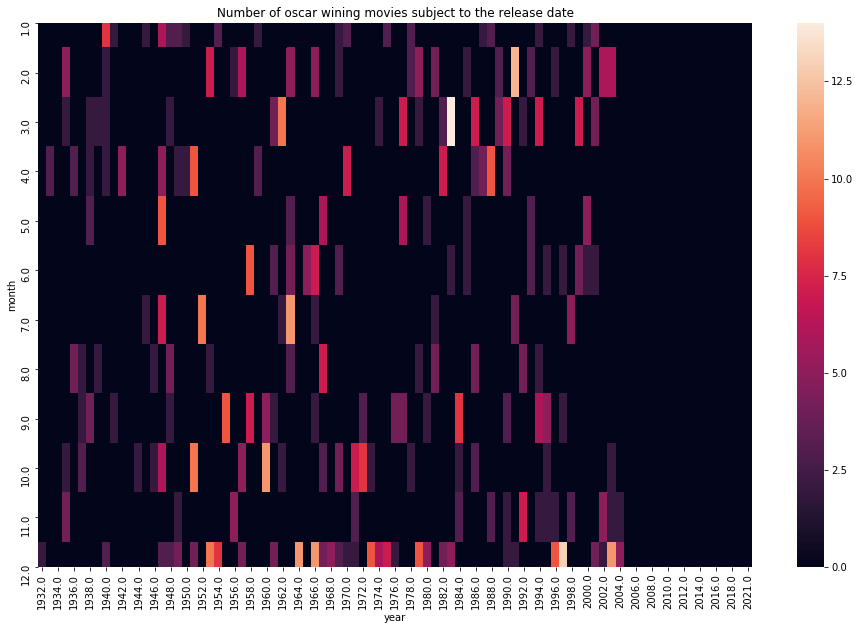

In [189]:
fig, ax = plt.subplots(figsize=(16,10)) 
sns.heatmap(oscars_heat,ax=ax)
plt.title('Number of oscar wining movies subject to the release date')

In [191]:
year_month=movies.groupby(['month','year']).mean()
revenue=year_month.pivot_table(index='month',columns='year',values='Gain_loss').fillna(0)
revenue.head()

year,0.0,1920.0,1921.0,1923.0,1925.0,1927.0,1929.0,1930.0,1931.0,1932.0,...,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2012.0,2013.0,2016.0
month,,,,,,,,,,,,,,,,,,,,,
0.0,-1.819605e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-1999254.0,0.0,0.0,-522902.0,...,1.667451e+07,2.505642e+07,754480.0,-2.542582e+07,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.000000e+00,-9189.0,-223084.0,0.0,0.0,-2289514.5,0.0,0.0,-270242.0,-306535.0,...,3.978490e+07,-3.136748e+06,-3482431.0,3.395535e+07,-449467.0,64596398.0,0.0,0.0,-62879859.0,0.0
3.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1467391.0,0.0,...,1.572008e+07,4.985983e+06,-7848131.0,0.000000e+00,44828421.0,0.0,0.0,0.0,0.0,0.0
4.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.051285e+06,-2.596400e+06,-97722393.0,-8.914222e+06,7038417.0,0.0,-969842.0,0.0,0.0,0.0


In [192]:
revenu_heat=revenue.iloc[1:,35:]

Text(0.5, 1, 'aAerage Gain&Loss subject to the release date')

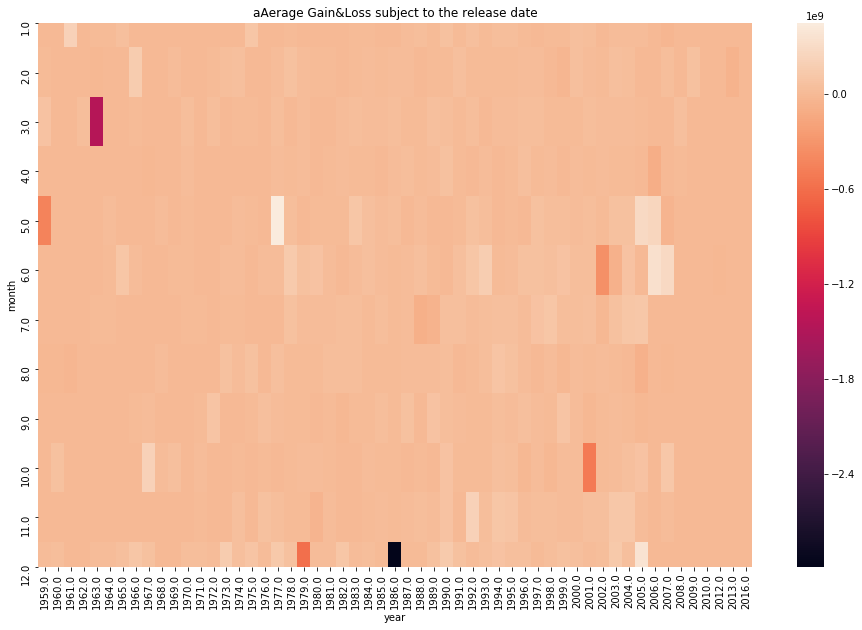

In [194]:
fig, ax = plt.subplots(figsize=(16,10)) 
sns.heatmap(revenu_heat,ax=ax)
plt.title('Aerage Gain&Loss subject to the release date')

In [43]:
movies.wins.describe()

count    178117.000000
mean          0.325601
std           2.058501
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         198.000000
Name: wins, dtype: float64

In [44]:
movies.wins.unique()

array([  0,   2,   3,   6,   4,   5,  16,   8,  23,  10,   7,  12,  15,
        17,  11,  19,  14,  20,   9,  13,  22,  30,  21,  26,  18,  52,
        27,  24,  44,  43,  54,  28,  25,  57,  55,  38,  39,  36,  66,
        64,  35,  46,  29,  49,  81,  34,  45,  67,  86,  33, 115,  48,
        37,  74, 114,  97,  71,  32, 123, 198, 105,  47,  31,  50,  41,
        96,  69,  42, 102,  59,  84,  51,  40,  83,  63,  60], dtype=int64)

Text(0.5, 1.0, 'Scatter plot of the number of wins vs metascore')

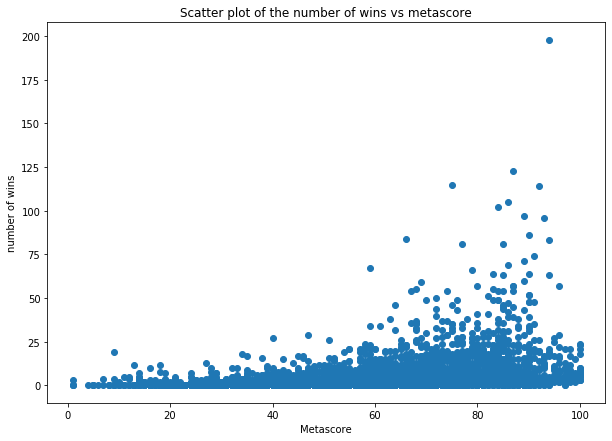

In [49]:
ax,fig=plt.subplots(figsize=(10,7))
plt.scatter(movies.metascore,movies.wins)
plt.xlabel('Metascore')
plt.ylabel('number of wins')
plt.title('Scatter plot of the number of wins vs metascore')